### 1. Imports

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")
import gym
import numpy as np
from stable_baselines3 import PPO, A2C
from matplotlib import pyplot as plt

In [2]:
# Import classes
from rl_environment import Environment

### 2. Environment creation

#### Parameters for Simulation

In [3]:
number_of_regional_warehouses = 3
max_inventory_amount_regional_warehouses = 30
max_inventory_amount_central_warehouse = 60
customer_demand_per_step = [2,1,3]  # List needs one entry per regional warehouse 
simulation_length = 45
lead_time = 2
shipment_amount = [6, 10]  # Regarding regional warehouses
with_manufacturer = False
cw_shipment_amount = 10  # Regarding central warehosue
manufacturer_prod_capacity_per_step = 5
shipment_var_cost_per_unit = 0.05
shipment_fixed_cost = .25  # Reward penalty
inventory_holding_cost_multiplier = 1 # Standard = 1; Can be lowered; Not higher that 1

#### Parameters for Agent Training

In [4]:
algorithm = "A2C"  # "PPO" or "A2C"
training_steps = 30000

print("-> Equals to " + str(int(training_steps/simulation_length)) + " simulation training rounds")

-> Equals to 666 simulation training rounds


#### Creating Environment

In [5]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time,
                  shipment_amount = shipment_amount,
                  manufacturer = with_manufacturer,
                  cw_shipment_amount = cw_shipment_amount,
                  mf_prod_capacity = manufacturer_prod_capacity_per_step,
                  shipment_var_cost_per_unit = shipment_var_cost_per_unit,
                  shipment_fixed_cost = shipment_fixed_cost,
                  inventory_holding_cost_multiplier = inventory_holding_cost_multiplier
                 )

env.print_environment_information()

Simulation created with the following parameters:
________________________________________________________________________________
Simulation | Round 1
-------------------
-> Active shipments:
No active shipments

-> Warehouses:
central_warehouse ; Inventory: 20
regional_warehouse_1 ; ID: 1 ; Inventory: 10 ; Demand: 2 ; Lost sales: 0
regional_warehouse_2 ; ID: 2 ; Inventory: 10 ; Demand: 1 ; Lost sales: 0
regional_warehouse_3 ; ID: 3 ; Inventory: 10 ; Demand: 3 ; Lost sales: 0
________________________________________________________________________________
Environment Information
-----------------------
-> Gym spaces:
Observation space: Dict(rw_inventories:MultiDiscrete([31 31 31]), shipments:MultiDiscrete([2 2 2]))
Action space: MultiDiscrete([3 3 3])
Starting state: {'rw_inventories': array([10, 10, 10]), 'shipments': array([0, 0, 0])}

-> Reward penalty per shipment size:
Shipment of 6: 0.55
Shipment of 10: 0.75
_______________________________________________________________________

### 3. RL model training

###### Model Selection
PPO (Proximal Policy Optimization)
https://openai.com/blog/openai-baselines-ppo/

A2C
https://openai.com/blog/baselines-acktr-a2c/

In [6]:
if algorithm.upper() == "PPO":
    trained_model = PPO("MultiInputPolicy", env, verbose=1)
elif algorithm.upper() == "A2C":
    trained_model = A2C("MultiInputPolicy", env, verbose=1)
else:
    print("Model not found")
    exit()
trained_model.learn(total_timesteps=training_steps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 45       |
|    ep_rew_mean        | -13.6    |
| time/                 |          |
|    fps                | 365      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -2.47    |
|    explained_variance | 0.122    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 24.1     |
|    value_loss         | 109      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 45       |
|    ep_rew_mean        | -11.7    |
| time/                 |          |
|    fps                | 376      |
|    iterations         | 200      |
|    time_elapsed 

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 45       |
|    ep_rew_mean        | -29.2    |
| time/                 |          |
|    fps                | 365      |
|    iterations         | 1400     |
|    time_elapsed       | 19       |
|    total_timesteps    | 7000     |
| train/                |          |
|    entropy_loss       | -0.702   |
|    explained_variance | 0.154    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | -0.0333  |
|    value_loss         | 0.0396   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 45       |
|    ep_rew_mean        | -29.1    |
| time/                 |          |
|    fps                | 368      |
|    iterations         | 1500     |
|    time_elapsed       | 20       |
|    total_timesteps    | 7500     |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 45       |
|    ep_rew_mean        | -7.17    |
| time/                 |          |
|    fps                | 390      |
|    iterations         | 2800     |
|    time_elapsed       | 35       |
|    total_timesteps    | 14000    |
| train/                |          |
|    entropy_loss       | -2.28    |
|    explained_variance | 0.87     |
|    learning_rate      | 0.0007   |
|    n_updates          | 2799     |
|    policy_loss        | 20.1     |
|    value_loss         | 48.3     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 45       |
|    ep_rew_mean        | -6.22    |
| time/                 |          |
|    fps                | 392      |
|    iterations         | 2900     |
|    time_elapsed       | 36       |
|    total_timesteps    | 14500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 45       |
|    ep_rew_mean        | 0.372    |
| time/                 |          |
|    fps                | 394      |
|    iterations         | 4200     |
|    time_elapsed       | 53       |
|    total_timesteps    | 21000    |
| train/                |          |
|    entropy_loss       | -0.727   |
|    explained_variance | -0.361   |
|    learning_rate      | 0.0007   |
|    n_updates          | 4199     |
|    policy_loss        | 0.228    |
|    value_loss         | 0.0274   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 45       |
|    ep_rew_mean        | 0.787    |
| time/                 |          |
|    fps                | 395      |
|    iterations         | 4300     |
|    time_elapsed       | 54       |
|    total_timesteps    | 21500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 45       |
|    ep_rew_mean        | 8.69     |
| time/                 |          |
|    fps                | 391      |
|    iterations         | 5600     |
|    time_elapsed       | 71       |
|    total_timesteps    | 28000    |
| train/                |          |
|    entropy_loss       | -0.257   |
|    explained_variance | 0.957    |
|    learning_rate      | 0.0007   |
|    n_updates          | 5599     |
|    policy_loss        | -0.0271  |
|    value_loss         | 0.00594  |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 45        |
|    ep_rew_mean        | 9.32      |
| time/                 |           |
|    fps                | 392       |
|    iterations         | 5700      |
|    time_elapsed       | 72        |
|    total_timesteps    | 28500     |
| train/                |    

###### Learning Curve

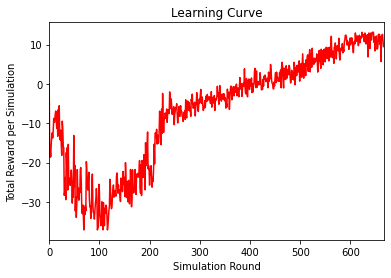

In [7]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(env.total_reward, color="red")
plt.title("Learning Curve")
plt.xlim(0, len(env.total_reward))
plt.ylabel("Total Reward per Simulation")
plt.xlabel("Simulation Round")
plt.show()

### 4. Run simulation

In [8]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = {}
for rw_id in env.simulation.get_regional_warehouses():
    inventory_levels[rw_id] = []
    
cw_inventory_level = []

# Run simulation with model
while not done:
    action, _states = trained_model.predict(state)
    state, reward, done, info = env.step(action)
    
    # For Graph
    i = 1
    for inv in info["RW Invs:"]:
        inventory_levels[i].append(inv)
        i += 1
    try:
        cw_inventory_level.append(info["CW Inv:"])
    except:
        pass
    
    # print(env.simulation.print_state())
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 44 | RW Invs: [8, 9, 7] | Shipments [0, 0, 0] | Action: [0, 0, 0] | Reward: 0.11 | 
Steps left: 43 | RW Invs: [6, 8, 4] | Shipments [0, 0, 0] | Action: [0, 0, 0] | Reward: 0.15 | 
Steps left: 42 | RW Invs: [4, 7, 1] | Shipments [0, 0, 0] | Action: [0, 0, 0] | Reward: 0.27 | 
Steps left: 41 | RW Invs: [2, 6, 0] | Shipments [1, 0, 1] | Action: [1, 0, 1] | Reward: -0.36 | 
Steps left: 40 | RW Invs: [0, 5, 0] | Shipments [1, 0, 1] | Action: [0, 0, 0] | Reward: 0.06 | 
Steps left: 39 | RW Invs: [4, 4, 3] | Shipments [0, 0, 0] | Action: [0, 0, 0] | Reward: 0.22 | 
Steps left: 38 | RW Invs: [2, 3, 0] | Shipments [1, 0, 0] | Action: [1, 0, 0] | Reward: 0.34 | 
Steps left: 37 | RW Invs: [0, 2, 0] | Shipments [1, 0, 1] | Action: [0, 0, 1] | Reward: 0.11 | 
Steps left: 36 | RW Invs: [4, 1, 0] | Shipments [0, 1, 1] | Action: [0, 1, 1] | Reward: -0.28 | 
Steps left: 35 | RW Invs: [2, 0, 3] | Shipments [1, 1, 1] | Action: [1, 0, 1] | Reward: 0.16 | 
Steps left: 34 | RW Invs: [0, 5, 6] | 

###### Inventory level graphs

[8, 6, 4, 2, 0, 4, 2, 0, 4, 2, 0, 4, 2, 0, 4, 2, 0, 4, 2, 0, 4, 2, 0, 4, 2, 0, 4, 2, 0, 4, 2, 0, 4, 2, 0, 4, 2, 0, 4, 2, 0, 4, 2, 0, 4]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 5, 4, 3, 2, 1, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 5, 4, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 5, 4, 3, 2, 1, 0, 5]
[7, 4, 1, 0, 0, 3, 0, 0, 0, 3, 6, 9, 6, 3, 6, 3, 0, 3, 0, 0, 3, 6, 3, 0, 0, 0, 3, 6, 9, 6, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3]


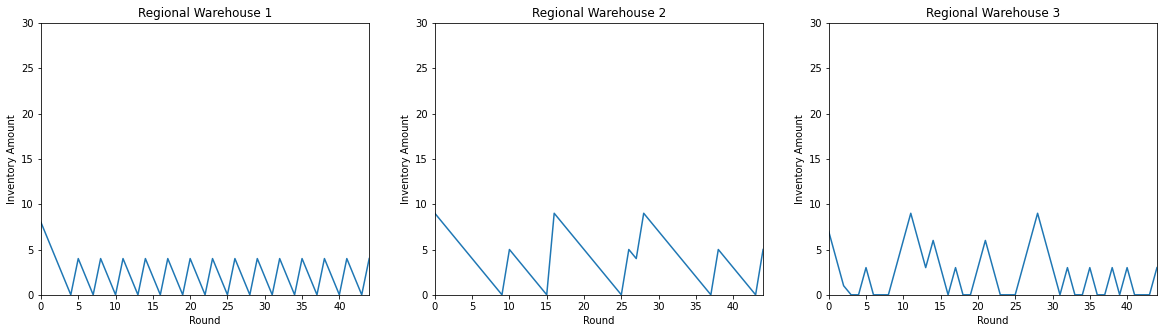

In [9]:
# Plot inventories of regional warehouses

plt.rcParams["figure.figsize"] = (20, 5)

for rw_id in inventory_levels:
    print(inventory_levels[rw_id])
    plt.subplot(1, number_of_regional_warehouses, rw_id)
    plt.plot(inventory_levels[rw_id])
    plt.title("Regional Warehouse " + str(rw_id))
    plt.ylim(0, max_inventory_amount_regional_warehouses)
    plt.xlim(0, simulation_length-1)
    plt.ylabel("Inventory Amount")
    plt.xlabel("Round")

plt.show()

In [10]:
# Plot central warehouse inventory (Only display if simulated by adding a manufacturer)
if len(cw_inventory_level) != 0:
    plt.rcParams["figure.figsize"] = (20, 5)
    plt.plot(cw_inventory_level, color="green")
    plt.title("Central Warehouse")
    plt.ylim(0, max_inventory_amount_central_warehouse)
    plt.xlim(0, simulation_length-1)
    plt.ylabel("Inventory Amount")
    plt.xlabel("Round")
    plt.show()